*Disclaimer this is a fake email the names in the email do not intend to impersonate anyone*

**Client: Samantha Evans, Chief Marketing Officer at Global Bank**

**Data Science Company: Data Insights Inc.**

---

**Email from Samantha Evans:**

---

Subject: Request for Customer Segmentation Analysis

Dear Data Insights Team,

I hope this message finds you well. My name is Samantha Evans, and I am the Chief Marketing Officer at Global Bank. We are currently looking to enhance our understanding of our customer base to improve our marketing strategies, product offerings, and overall customer experience. To achieve this, we are seeking your expertise in performing a comprehensive customer segmentation analysis.

**Background:**

Global Bank is one of the leading financial institutions, offering a wide range of banking products and services, including savings and checking accounts, credit cards, loans, investment services, and more. Our customer base is diverse, comprising individuals from different age groups, income levels, geographical locations, and financial needs.

**Objective:**

We aim to identify distinct segments within our customer base to tailor our marketing efforts, design targeted product offerings, and optimize customer engagement. The segmentation should provide insights into the following aspects:

1. **Demographics:** Age, gender, income level, education, occupation, etc.
2. **Geographic Information:** City, state, country, and other relevant geographic details.
3. **Behavioral Patterns:** Spending habits, product usage, transaction frequency, online banking usage, etc.
4. **Psychographics:** Lifestyle, interests, values, and attitudes towards banking and financial management.

**Data Availability:**

We have a comprehensive dataset that includes demographic information, transaction history. We can provide the following data:

- Transaction ID
- Customer ID
- Date of Birth
- Gender 
- Location
- Balance
- Transaction Date
- Transaction Time
- Transaction amount

**Project Requirements:**

1. **Segmentation Analysis:** Develop a robust segmentation model to categorize our customers into distinct segments.
2. **Segment Profiles:** Provide detailed profiles for each segment, including key characteristics, preferences, and behaviors.
3. **Actionable Insights:** Offer recommendations on how to engage with each segment effectively, including marketing strategies, product development, and customer service improvements.
4. **Visualization and Reporting:** Present the findings in a visually appealing and easy-to-understand format, including charts, graphs, and dashboards.
5. **Implementation Guidance:** Advise on how to integrate the segmentation results into our existing CRM and marketing systems.

**Timeline:**

We are looking to complete this project within the next three months. Please provide us with a detailed proposal, including the project plan, timeline, and cost estimate, by the end of next week.

We believe that Data Insights Inc. has the expertise and experience to deliver a high-quality segmentation analysis that will drive significant value for our bank. We look forward to your proposal and hope to collaborate with your team on this important project.

Thank you for your time and consideration.

Best regards,

Samantha Evans  
Chief Marketing Officer  
Global Bank  
sm.fake.com 

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('bank_transactions.csv')
df.sample(3)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
773838,T773839,C6528137,10/5/95,M,PUNE,7773.68,6/9/16,195321,50.0
648830,T648831,C1442711,1/1/1800,M,NEW DELHI,33013.69,29/8/16,92206,15.0
627741,T627742,C7939856,9/10/91,M,MUMBAI,2378.64,25/8/16,180015,297.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [4]:
df.rename(columns={'TransactionAmount (INR)': 'TransactionAmount'}, inplace=True)
df.sample(1)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount
284851,T284852,C2613566,24/7/83,F,JAMSHEDPUR,30.11,11/8/16,172754,669.0


In [5]:
df1 = df.copy()
df1['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'])
df1['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df1.sample(3)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount
904694,T904695,C7240173,1992-01-03,F,KOLKATA,15607.34,2016-12-09,145936,96.0
845550,T845551,C8637953,1980-08-14,M,BAHADURGARH (HARYANA),729.97,2016-09-09,45047,65.0
1047794,T1047795,C1618692,1991-09-12,M,MUMBAI,184462.99,2016-09-18,185750,1190.0


In [6]:
df.describe()

,CustAccountBalance,TransactionTime,TransactionAmount
count,1.046198e+06,1.048567e+06,1.048567e+06
mean,1.154035e+05,1.570875e+05,1.574335e+03
std,8.464854e+05,5.126185e+04,6.574743e+03
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.721760e+03,1.240300e+05,1.610000e+02
50%,1.679218e+04,1.642260e+05,4.590300e+02
75%,5.765736e+04,2.000100e+05,1.200000e+03
max,1.150355e+08,2.359590e+05,1.560035e+06


Customer born in 1800 cannot be alive today to make transactions in 2016 and customers can not be born before we reach the year like 2073

In [9]:
from datetime import datetime
today = datetime.today().year
df1['Age'] = today - df1['CustomerDOB'].dt.year
df1.sample(3)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount,Age
119547,T119548,C4527191,1993-10-01,M,NOIDA,22206.08,2016-06-08,154629,4508.0,31.0
558067,T558068,C1934352,1982-04-26,M,DELHI,328298.31,2016-08-23,135017,150.0,42.0
15237,T15238,C3487221,1986-10-08,F,CHENNAI,63712.31,2016-09-26,193655,200.0,38.0


In [10]:
df2 = df1[df1['Age'].between(18, 90)]
print(df1.shape)
print(df2.shape)

(1048567, 10)
(893367, 10)


In [11]:
df2.isna().sum()

TransactionID            0
CustomerID               0
CustomerDOB              0
CustGender              13
CustLocation           111
CustAccountBalance    1990
TransactionDate          0
TransactionTime          0
TransactionAmount        0
Age                      0
dtype: int64

In [12]:
df3 = df2.dropna()
df3.shape

(891253, 10)

In [13]:
df3.duplicated().sum()

0

In [14]:
df3.isnull().sum()

TransactionID         0
CustomerID            0
CustomerDOB           0
CustGender            0
CustLocation          0
CustAccountBalance    0
TransactionDate       0
TransactionTime       0
TransactionAmount     0
Age                   0
dtype: int64

In [15]:
len(df3['TransactionID'].unique())

891253

In [17]:
len(df3['CustomerID'].unique())

769988

In [20]:
df4 = df3.drop_duplicates(subset='CustomerID')
df4.shape

(769988, 10)

In [21]:
df5 = df4.drop(columns = ['TransactionID', 'CustomerID', 'CustomerDOB'])
df5.sample(3)

,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount,Age
808881,M,KARIMNAGAR,13259.73,2016-05-09,194835,219.0,28.0
554457,F,KOLKATA,26.71,2016-08-23,185714,10.0,32.0
555975,F,CHANDIGARH,74142.54,2016-08-24,153720,2549.0,40.0


In [22]:
df5.Age.dtype

dtype('float64')

In [23]:
df5['Age'] = df5['Age'].astype('int64')
print(df5['Age'].dtype)

int64


In [24]:
df5.describe(include = 'object')

,CustGender,CustLocation
count,769988,769988
unique,2,7347
top,M,MUMBAI
freq,556541,75992


It is clear that there is an imbalance in the data with most of the individuals coming from male population. 

In [26]:
print(df5.CustGender.value_counts(normalize = True) * 100)
print(df5.CustGender.value_counts())

CustGender
M    72.279178
F    27.720822
Name: proportion, dtype: float64
CustGender
M    556541
F    213447
Name: count, dtype: int64


In [27]:
value_counts = df5['CustLocation'].value_counts()
value_counts_df = value_counts.reset_index()
value_counts_df.columns = ['CustLocation', 'ValueCounts']
value_counts_df

,CustLocation,ValueCounts
0,MUMBAI,75992
1,BANGALORE,61860
2,NEW DELHI,57755
3,GURGAON,55141
4,DELHI,52847
...,...,...
7342,KOCHI 12,1
7343,DOMBIVALI E TILAKNAGAR THANE,1
7344,MANIGACHHI,1
7345,GHIKARA,1


In [28]:
locations = value_counts_df[value_counts_df.ValueCounts.between(1000,75992)]
locations_arr = list(locations.CustLocation)
locations_arr

['MUMBAI',
 'BANGALORE',
 'NEW DELHI',
 'GURGAON',
 'DELHI',
 'NOIDA',
 'CHENNAI',
 'PUNE',
 'HYDERABAD',
 'THANE',
 'KOLKATA',
 'GHAZIABAD',
 'NAVI MUMBAI',
 'AHMEDABAD',
 'FARIDABAD',
 'JAIPUR',
 'CHANDIGARH',
 'LUCKNOW',
 'MOHALI',
 'SURAT',
 'NASHIK',
 'LUDHIANA',
 'VISAKHAPATNAM',
 'DEHRADUN',
 'INDORE',
 'AMRITSAR',
 'KANPUR',
 'VADODARA',
 'AGRA',
 'MEERUT',
 'NAGPUR',
 'GREATER NOIDA',
 'COIMBATORE',
 'AURANGABAD',
 'RANGA REDDY',
 'PANCHKULA',
 'GUNTUR',
 'GUWAHATI',
 'JALANDHAR',
 'BHOPAL',
 'PATNA',
 'UDAIPUR',
 'REWARI',
 'RANCHI',
 'BENGALURU',
 'HOWRAH',
 'PATIALA',
 'ALWAR',
 'NORTH 24 PARGANAS',
 'SONIPAT',
 'ERNAKULAM',
 'SECUNDERABAD',
 'ALLAHABAD',
 'BAMBOLIM',
 'PANIPAT',
 'SILIGURI',
 'ZIRAKPUR',
 'KOLHAPUR',
 'RAJKOT',
 'BAREILLY',
 'KANGRA',
 'ALIGARH',
 'RAIPUR',
 'JAMSHEDPUR',
 'WARANGAL',
 'KARNAL',
 'AMBALA',
 'KOTTAYAM',
 'MANGALORE',
 'KHARAR',
 'HOSUR',
 'SAHARANPUR',
 'SAS NAGAR']

In [29]:
df6 = df5[df5.CustLocation.isin(locations_arr)]
print(df5.shape)
print(df6.shape)

(769988, 7)
(578307, 7)


In [30]:
df6.sample(3)

,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount,Age
234995,F,NEW DELHI,647686.52,2016-07-08,162153,22995.00,41
244930,M,GURGAON,81922.99,2016-12-08,4132,30.00,41
136601,M,NAVI MUMBAI,20786.14,2016-05-08,90733,59.36,38


# Exploratory Data Analysis (EDA)

In [32]:
df6.groupby('CustGender')[['CustAccountBalance', 'TransactionAmount']].agg(['min', 'max', 'mean'])

CustAccountBalance                            TransactionAmount  \
                          min          max          mean               min   
CustGender                                                                   
F                         0.0  12343905.63  80541.452194               0.0   
M                         0.0  36090853.96  89211.210854               0.0   

                                     
                   max         mean  
CustGender                           
F           1380002.88  1503.570805  
M           1560034.99  1247.715115

In [33]:
df6.groupby('Age')[['CustAccountBalance', 'TransactionAmount']].agg(['min', 'max', 'mean'])

CustAccountBalance                             TransactionAmount  \
                   min          max           mean               min   
Age                                                                    
18             1878.39    116515.21   50251.678824              25.0   
19             1002.83    378325.52   78735.889231              25.0   
20                0.00     71139.38   11102.906923              10.0   
21                4.66    116516.02   17515.201500              85.0   
22               29.43    247140.63   26773.087037               0.0   
23                5.37    278337.10   17395.460000               0.0   
24               63.96    413680.87   41085.236687               1.0   
25               15.76    424880.72   27416.726353               1.0   
26                0.44  10268800.62   33686.369099               0.0   
27                0.00   2089425.75   30175.013437               0.0   
28                0.00   2249370.54   35458.685206               0.0   
29                0.00   3135444.31   29299.459946               0.0   
30                0.00   1497456.64   25735.377603               0.0   
31                0.00   6903931.76   35365.514844               0.0   
32                0.00   6153347.84   44391.418074               0.0   
33                0.00  16834937.99   45606.090107               0.0   
34                0.00   6464804.71   49145.090991               0.0   
35                0.00   9198576.98   73676.424802               0.0   
36                0.00  11091701.10   68586.620405               0.0   
37                0.00  14276260.10   84968.421078               0.0   
38                0.00  12343905.63   89211.896553               0.0   
39                0.00   9475590.98   87279.707334               0.0   
40                0.00  15715987.76  110538.884400               0.0   
41                0.00  15436498.08  101526.987421               0.0   
42                0.00   9141893.63  115158.344417               0.0   
43                0.00  27979586.92  144489.165890               0.0   
44                0.00   7271335.09  163322.964685               0.0   
45                0.00  10546545.67  146618.309706               0.0   
46                0.00  14472840.56  166044.544087               0.0   
47                0.00   6994347.73  177770.250744               0.0   
48                0.00  12744388.47  186975.420276               0.0   
49                0.00  15158474.07  216454.824309               0.0   
50                0.00  36090853.96  301495.664521               0.0   

                              
            max         mean  
Age                           
18      5787.69  2775.446471  
19     28750.00  2830.300000  
20     11696.00  1550.336410  
21     10906.00  1991.400000  
22     26964.00  2950.589444  
23     51350.00  1886.032889  
24      7238.00   870.921718  
25    100742.00  1353.858798  
26     56368.23  1393.633718  
27    200001.24   947.629806  
28     63826.00   807.693739  
29     93500.00   750.336117  
30    158134.00   792.703477  
31    350000.00   963.499894  
32    310002.83   887.389557  
33    108700.74   947.504270  
34    150000.00  1054.573369  
35    600003.45  1165.595011  
36    600008.32  1261.731278  
37    314694.08  1309.703136  
38    265414.00  1374.449535  
39    720001.16  1464.749208  
40    168192.00  1626.104287  
41    561001.00  1593.706800  
42    278800.18  1646.246131  
43    525003.83  1690.049807  
44    133519.00  1751.643265  
45    247832.00  1981.436102  
46   1380002.88  1882.953300  
47    514320.00  2013.897292  
48   1560034.99  2229.708158  
49    200000.00  1971.652297  
50    299009.96  2343.893089

In [34]:
df7 = df6.copy()
df7['BalTransRatio'] = df7['TransactionAmount']/df7['CustAccountBalance']
df7.sample(3)

,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount,Age,BalTransRatio
265282,M,MUMBAI,58.77,2016-12-08,163513,560.0,35,9.528671
680215,M,JAIPUR,5.14,2016-08-30,215634,22.0,31,4.280156
644191,M,GHAZIABAD,97.74,2016-08-29,164326,177.0,34,1.810927


In [35]:
df7.groupby('CustGender')['BalTransRatio'].agg(['min', 'max', 'mean'])

,min,max,mean
CustGender,,,
F,0.0,inf,inf
M,0.0,inf,inf


In [36]:
df7.replace([np.inf, -np.inf], np.nan, inplace=True)
df7.dropna(subset=['CustAccountBalance', 'TransactionAmount', 'Age', 'BalTransRatio'], inplace=True)

In [37]:
df7.groupby('CustGender')['BalTransRatio'].agg(['min', 'max', 'mean'])

,min,max,mean
CustGender,,,
F,0.0,1571500.0,55.219362
M,0.0,900000.0,32.329424


In [38]:
more = df7[df7.TransactionAmount > df7.CustAccountBalance]
more.shape

(54797, 8)

Either these people are on credit facilities or there are errors in the recording, because of limited information, we are going to take them out of the data

In [40]:
df8 = df7[~(df7.TransactionAmount > df7.CustAccountBalance)]
print(df7.shape)
print(df8.shape)

(577335, 8)
(522538, 8)


In [41]:
df8.groupby('CustGender')['BalTransRatio'].agg(['min', 'max', 'mean'])

,min,max,mean
CustGender,,,
F,0.0,1.0,0.074564
M,0.0,1.0,0.077845


In [42]:
df8.groupby('Age')['BalTransRatio'].agg(['min', 'max', 'mean'])

,min,max,mean
Age,,,
18,0.000450,0.204324,0.057026
19,0.000464,0.840511,0.174014
20,0.000317,0.969915,0.214068
21,0.005272,0.771040,0.326429
22,0.000000,0.822211,0.161144
23,0.000000,0.716455,0.159008
24,0.000058,0.896939,0.131248
25,0.000048,0.991744,0.110555
26,0.000000,0.984362,0.076162


**Age Group Analysis**:
   - **Age 21**: This group has the highest mean transaction/balance ratio of approximately 0.326. This indicates that, on average, individuals in this age group tend to engage in transactions that are about one-third of their balance. This could suggest a higher propensity for spending relative to their available funds compared to other age groups.

**General Trends**:
   - **Younger vs. Older**: Generally, younger age groups (18-25) tend to have higher mean ratios compared to older age groups (30-50). This aligns with expectations that younger individuals might have more active financial lives involving frequent transactions and expenditures.

**Financial Behavior Implications**:
   - **Spending Patterns**: Higher transaction/balance ratios suggest different spending habits. Age groups with higher ratios might benefit from products and services tailored to frequent transactions and digital banking, while those with lower ratios might prefer savings or investment products.

**Business Insights**:
   - Global Bank can use this data to tailor marketing strategies and product offerings. For instance, targeting younger age groups with mobile banking solutions or cash management tools could align well with their higher transaction activity.

## Data Visualization

In [45]:
df8.columns

Index(['CustGender', 'CustLocation', 'CustAccountBalance', 'TransactionDate',
       'TransactionTime', 'TransactionAmount', 'Age', 'BalTransRatio'],
      dtype='object')

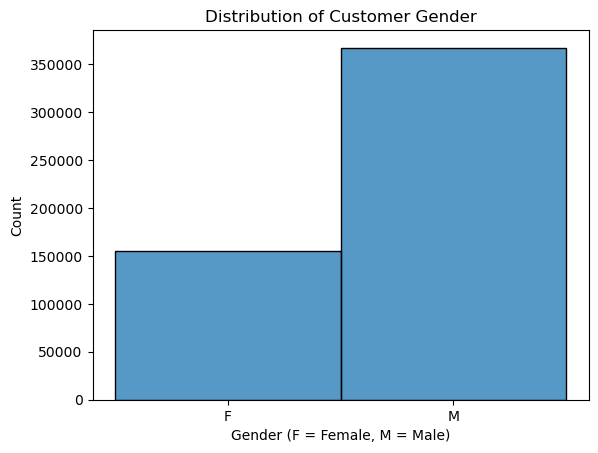

In [46]:
sns.histplot(data=df8, x='CustGender', bins=2, kde=False)
plt.title('Distribution of Customer Gender')
plt.xlabel('Gender (F = Female, M = Male)')
plt.ylabel('Count')
plt.show()

The disparity in size between males and females, which is threefold, may be attributed to various social or investigatory factors.

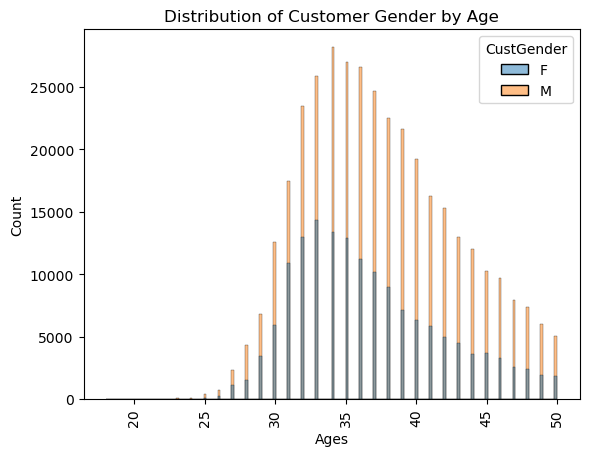

In [48]:
sns.histplot(data=df8, x='Age', hue='CustGender', kde=False)
plt.title('Distribution of Customer Gender by Age')
plt.xlabel('Ages')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

The gap between man and female become significatly larger from the age of 36 going forward

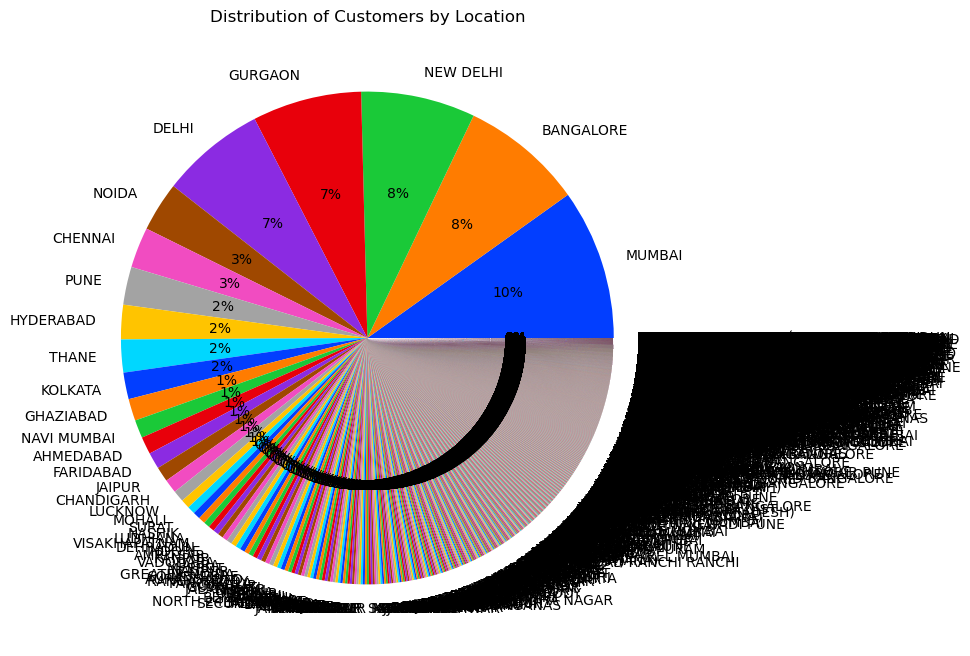

In [50]:
plt.figure(figsize=(8, 8))  
sns.set_palette('bright')  
plt.pie(x=value_counts.values, labels=value_counts.index, autopct='%.0f%%')
plt.title('Distribution of Customers by Location')
plt.show()

**11** out of **73** cities provide **54%** of the bank's customers. Knowing where the majority of customers are located helps in assessing regional economic risks, regulatory changes, and other factors that could impact business operations.

In [52]:
df8.drop('TransactionTime', axis = 1, inplace = True)
df8.sample(1)

,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount,Age,BalTransRatio
380573,F,BANGALORE,697736.1,2016-08-13,9230.0,43,0.013228


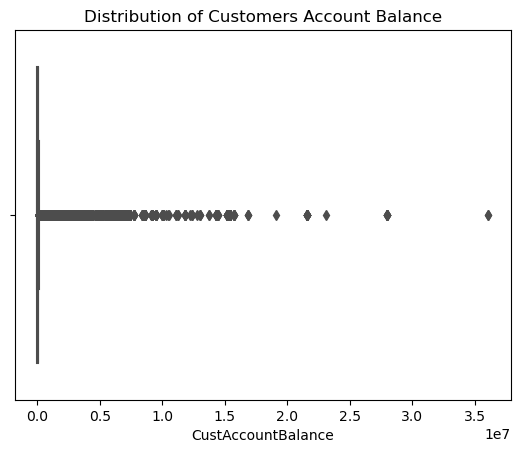

In [53]:
sns.boxplot(df8, x = 'CustAccountBalance')
plt.title('Distribution of Customers Account Balance')
plt.show()

In [54]:
from scipy.stats.mstats import winsorize

df9 = df8.copy()
df9 = df9[df9['CustAccountBalance'].isin(winsorize(df9['CustAccountBalance'], limits = (0, 0.25)))]
print(df8.shape)
print(df9.shape)

(522538, 7)
(391904, 7)


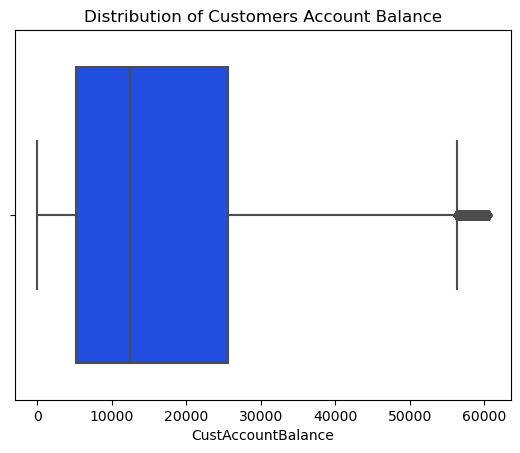

In [55]:
sns.boxplot(df9, x = 'CustAccountBalance')
plt.title('Distribution of Customers Account Balance')
plt.show()

We had to cut out all the millionares, as 75% if the population is below **$60 535.30**

In [57]:
df8.CustAccountBalance.describe()

count    5.225380e+05
mean     9.583025e+04
std      4.128592e+05
min      2.000000e-02
25%      7.410190e+03
50%      2.013528e+04
75%      6.053530e+04
max      3.609085e+07
Name: CustAccountBalance, dtype: float64

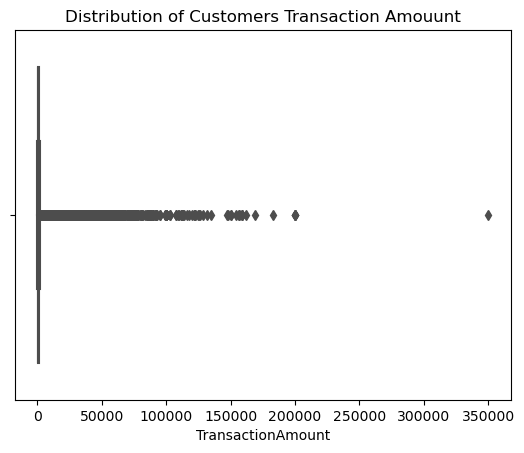

In [58]:
sns.boxplot(df8, x = 'TransactionAmount')
plt.title('Distribution of Customers Transaction Amouunt')
plt.show()

In [59]:
df10 = df9.copy()
df10 = df10[df10['TransactionAmount'].isin(winsorize(df10['TransactionAmount'], limits = (0.25, 0.25)))]
print(df9.shape)
print(df10.shape)

(391904, 7)
(196152, 7)


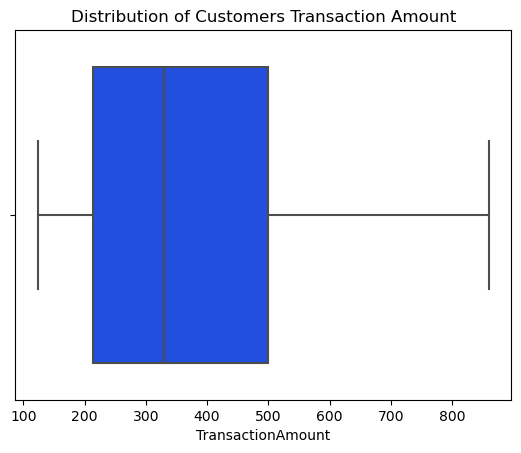

In [60]:
sns.boxplot(df10, x = 'TransactionAmount')
plt.title('Distribution of Customers Transaction Amount')
plt.show()

We had to cut out all the millionares and other outliers transaction , as 75% if the population is below **$860**

In [62]:
df9.TransactionAmount.describe()

count    391904.000000
mean        825.525326
std        1777.581912
min           0.000000
25%         124.000000
50%         330.000000
75%         860.000000
max       57500.000000
Name: TransactionAmount, dtype: float64

In [63]:
df10['TransactionMonth'] = df10['TransactionDate'].dt.month
df10.sample()

,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount,Age,BalTransRatio,TransactionMonth
774188,M,GURGAON,14275.8,2016-06-09,800.0,37,0.056039,6


In [64]:
df10.drop("TransactionDate", axis = 1, inplace = True)
df10.sample()

,CustGender,CustLocation,CustAccountBalance,TransactionAmount,Age,BalTransRatio,TransactionMonth
57847,M,GURGAON,26951.08,240.0,34,0.008905,3


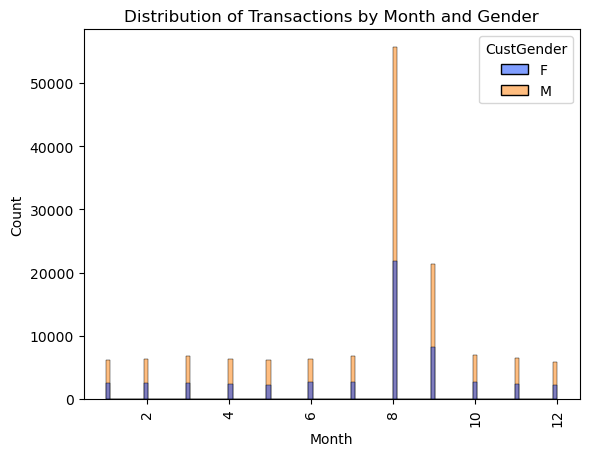

In [65]:
sns.histplot(data=df10, x='TransactionMonth', hue='CustGender', kde=False)
plt.title('Distribution of Transactions by Month and Gender')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

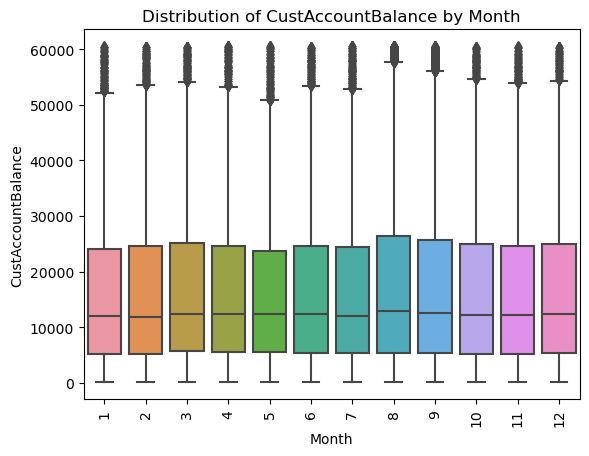

In [66]:
sns.boxplot(data=df10, x='TransactionMonth', y='CustAccountBalance')
plt.title('Distribution of CustAccountBalance by Month')
plt.xlabel('Month')
plt.ylabel('CustAccountBalance')
plt.xticks(rotation=90)
plt.show()

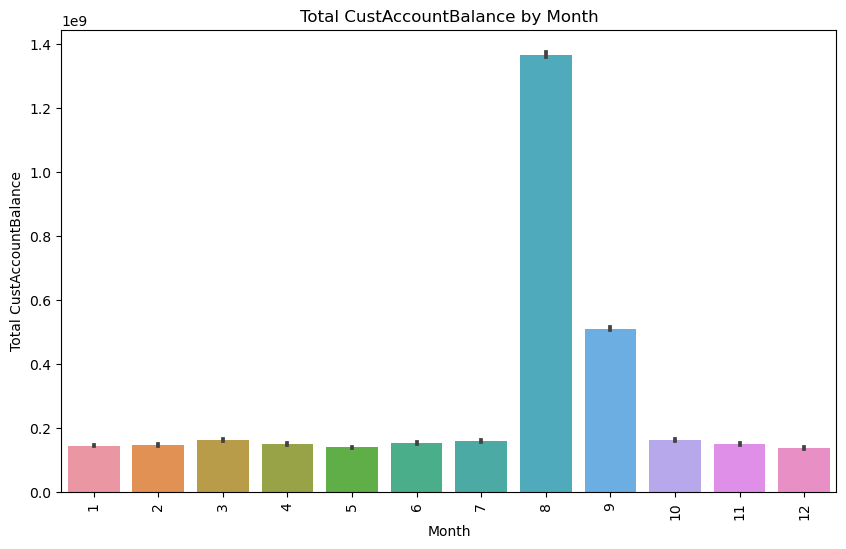

In [67]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df10, x='TransactionMonth', y='CustAccountBalance', estimator=sum)
plt.title('Total CustAccountBalance by Month')
plt.xlabel('Month')
plt.ylabel('Total CustAccountBalance')
plt.xticks(rotation=90)
plt.show()

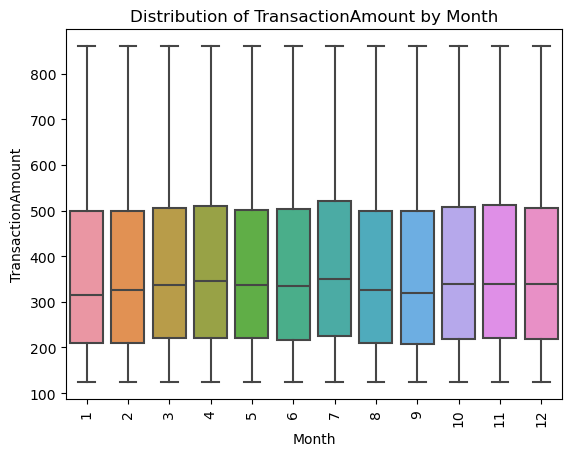

In [68]:
sns.boxplot(data=df10, x='TransactionMonth', y='TransactionAmount')
plt.title('Distribution of TransactionAmount by Month')
plt.xlabel('Month')
plt.ylabel('TransactionAmount')
plt.xticks(rotation=90)
plt.show()

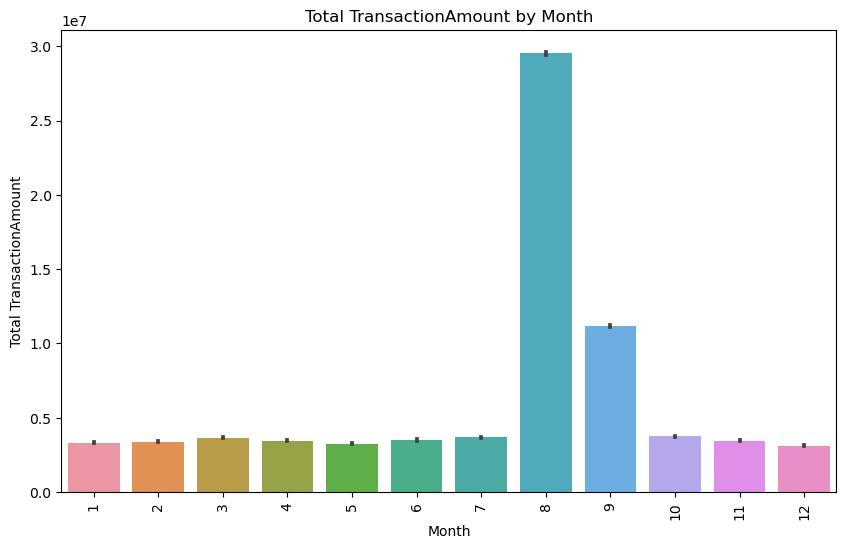

In [69]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df10, x='TransactionMonth', y='TransactionAmount', estimator=sum)
plt.title('Total TransactionAmount by Month')
plt.xlabel('Month')
plt.ylabel('Total TransactionAmount')
plt.xticks(rotation=90)
plt.show()

In [70]:
numerical = df10[['CustAccountBalance','TransactionAmount','Age','BalTransRatio', 'TransactionMonth']]
corr_matrix = numerical.corr()
corr_matrix

,CustAccountBalance,TransactionAmount,Age,BalTransRatio,TransactionMonth
CustAccountBalance,1.000000,0.084635,0.121892,-0.451144,0.011022
TransactionAmount,0.084635,1.000000,0.082383,0.115197,-0.001519
Age,0.121892,0.082383,1.000000,-0.037412,-0.000523
BalTransRatio,-0.451144,0.115197,-0.037412,1.000000,-0.001616
TransactionMonth,0.011022,-0.001519,-0.000523,-0.001616,1.000000


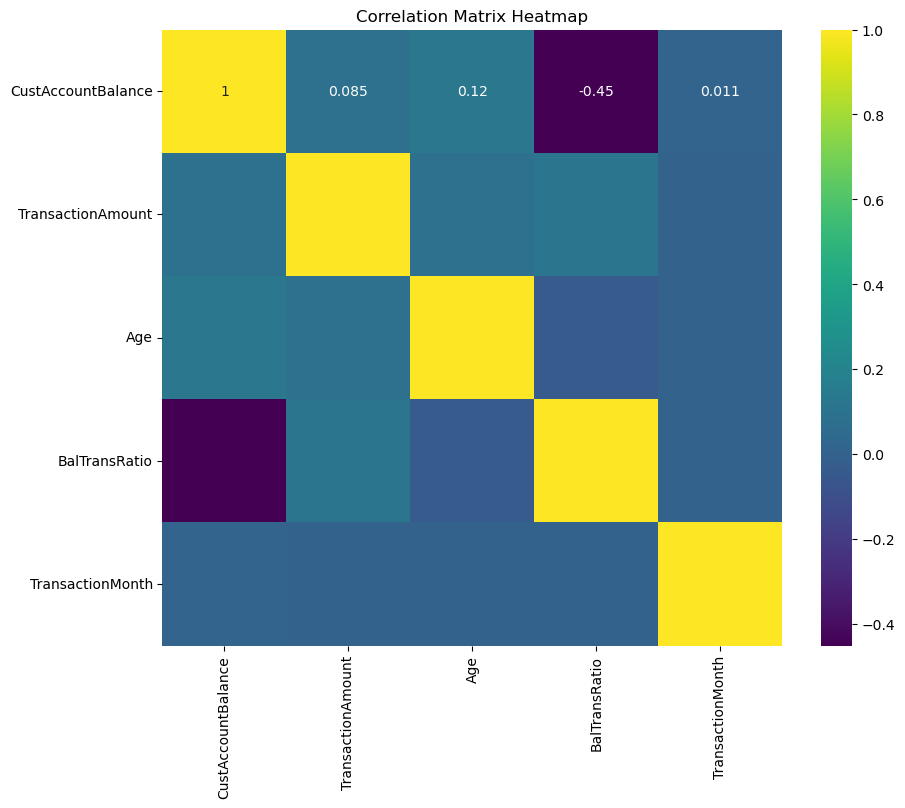

In [71]:
plt.figure(figsize=(10, 8)) 
sns.heatmap(corr_matrix, annot=True, fmt='.2g', cmap='viridis')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Label Encoding

In [73]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df10['CustGender'] = encoder.fit_transform(df10['CustGender'])
df10.sample(3)

,CustGender,CustLocation,CustAccountBalance,TransactionAmount,Age,BalTransRatio,TransactionMonth
467646,1,SURAT,282.76,208.0,28,0.735606,8
285242,1,HYDERABAD,3545.10,200.0,31,0.056416,11
383113,0,NAVI MUMBAI,20238.84,270.0,38,0.013341,8


In [74]:
dummies = pd.get_dummies(df10['CustLocation'])
dummies.sample(3)

,AGRA,AHMEDABAD,ALIGARH,ALLAHABAD,ALWAR,AMBALA,AMRITSAR,AURANGABAD,BAMBOLIM,BANGALORE,...,SECUNDERABAD,SILIGURI,SONIPAT,SURAT,THANE,UDAIPUR,VADODARA,VISAKHAPATNAM,WARANGAL,ZIRAKPUR
548333,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
959388,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
370487,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [75]:
dummies = dummies.astype(int)
dummies.sample(3)

,AGRA,AHMEDABAD,ALIGARH,ALLAHABAD,ALWAR,AMBALA,AMRITSAR,AURANGABAD,BAMBOLIM,BANGALORE,...,SECUNDERABAD,SILIGURI,SONIPAT,SURAT,THANE,UDAIPUR,VADODARA,VISAKHAPATNAM,WARANGAL,ZIRAKPUR
944365,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
164846,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
447226,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [76]:
df11 = df10.copy()
df11 = df11.merge(dummies, left_index = True, right_index = True)
df11.sample(3)

,CustGender,CustLocation,CustAccountBalance,TransactionAmount,Age,BalTransRatio,TransactionMonth,AGRA,AHMEDABAD,ALIGARH,...,SECUNDERABAD,SILIGURI,SONIPAT,SURAT,THANE,UDAIPUR,VADODARA,VISAKHAPATNAM,WARANGAL,ZIRAKPUR
143236,1,NEW DELHI,15056.29,799.0,44,0.053068,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
850487,0,BANGALORE,4383.04,245.0,32,0.055897,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
284514,1,DELHI,1214.93,434.0,36,0.357222,11,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
df11.drop('CustLocation', axis = 1, inplace = True)
df11.sample(3)

,CustGender,CustAccountBalance,TransactionAmount,Age,BalTransRatio,TransactionMonth,AGRA,AHMEDABAD,ALIGARH,ALLAHABAD,...,SECUNDERABAD,SILIGURI,SONIPAT,SURAT,THANE,UDAIPUR,VADODARA,VISAKHAPATNAM,WARANGAL,ZIRAKPUR
321300,1,4330.38,300.0,31,0.069278,10,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
739010,1,2581.66,824.0,33,0.319174,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
647622,1,1590.23,200.0,37,0.125768,8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
df11.describe()

,CustGender,CustAccountBalance,TransactionAmount,Age,BalTransRatio,TransactionMonth,AGRA,AHMEDABAD,ALIGARH,ALLAHABAD,...,SECUNDERABAD,SILIGURI,SONIPAT,SURAT,THANE,UDAIPUR,VADODARA,VISAKHAPATNAM,WARANGAL,ZIRAKPUR
count,196152.000000,196152.000000,196152.000000,196152.000000,196152.000000,196152.000000,196152.000000,196152.000000,196152.000000,196152.000000,...,196152.000000,196152.000000,196152.000000,196152.000000,196152.000000,196152.000000,196152.000000,196152.000000,196152.000000,196152.000000
mean,0.720543,17225.555543,383.354085,36.778575,0.076431,7.279778,0.004145,0.015549,0.001973,0.002228,...,0.002508,0.002401,0.002671,0.006230,0.031124,0.003247,0.004598,0.005297,0.002116,0.001983
std,0.448733,14902.120742,192.538787,5.102453,0.138810,2.689070,0.064246,0.123723,0.044374,0.047148,...,0.050020,0.048943,0.051617,0.078683,0.173653,0.056894,0.067656,0.072587,0.045948,0.044489
min,0.000000,127.460000,124.000000,18.000000,0.002074,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5389.910000,213.000000,33.000000,0.013365,6.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,12558.920000,330.000000,36.000000,0.027586,8.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,25334.740000,500.000000,40.000000,0.067526,9.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,60533.420000,860.000000,50.000000,1.000000,12.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The data is well scaled, from 0 to 1 all columns so that the PCA can work well

# Dimensionality Reduction

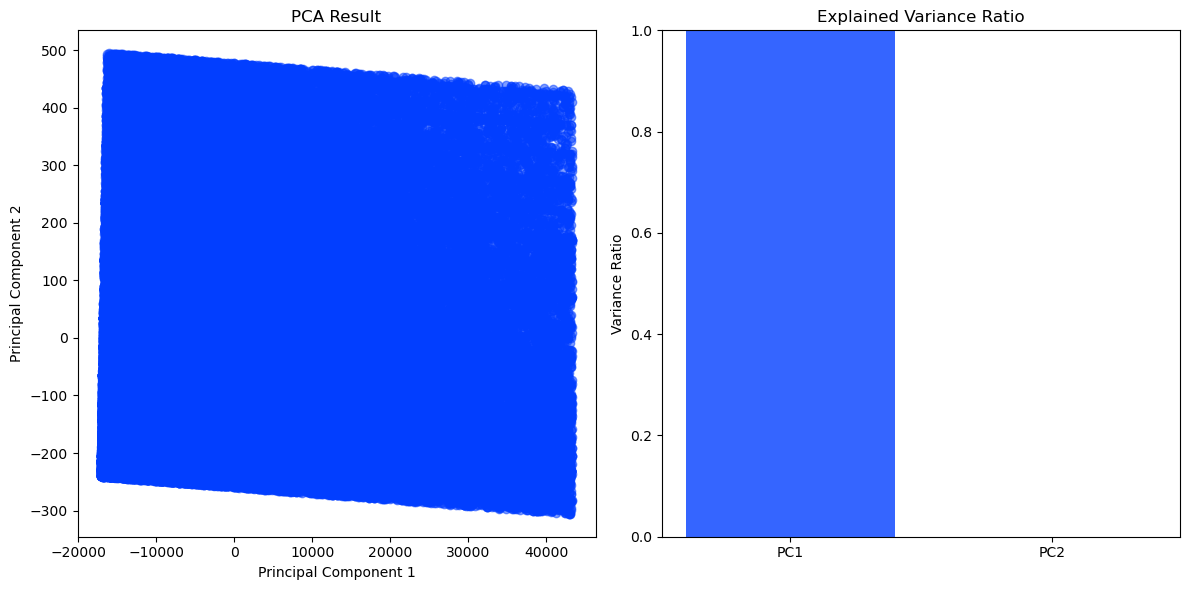

Explained variance ratio of PC1: 0.9998341381669557
Explained variance ratio of PC2: 0.00016570924183747373


In [81]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df11) 
df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

explained_variance_ratio = pca.explained_variance_ratio_

# Plotting PCA result
plt.figure(figsize=(12, 6))

# Scatter plot of PCA components
plt.subplot(1, 2, 1)
plt.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.5)
plt.title('PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Bar plot of explained variance ratios
plt.subplot(1, 2, 2)
plt.bar(['PC1', 'PC2'], explained_variance_ratio, alpha=0.8)
plt.title('Explained Variance Ratio')
plt.ylabel('Variance Ratio')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

print(f'Explained variance ratio of PC1: {explained_variance_ratio[0]}')
print(f'Explained variance ratio of PC2: {explained_variance_ratio[1]}')


In [82]:
from scipy import stats

male_customers = df11[df11['CustGender'] == 0]['CustAccountBalance']
female_customers = df11[df11['CustGender'] == 1]['CustAccountBalance']
t_stat, p_value = stats.ttest_ind(male_customers, female_customers)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

alpha = 0.05  
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in average CustAccountBalance between male and female customers.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in average CustAccountBalance between male and female customers.")


T-statistic: 22.173692169752734
P-value: 8.394582112219779e-109
Reject the null hypothesis: There is a significant difference in average CustAccountBalance between male and female customers.


In [83]:
from scipy import stats

male_customers = df11[df11['CustGender'] == 0]['TransactionAmount']
female_customers = df11[df11['CustGender'] == 1]['TransactionAmount']
t_stat, p_value = stats.ttest_ind(male_customers, female_customers)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

alpha = 0.05  
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in average TransactionAmount between male and female customers.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in average TransactionAmount between male and female customers.")


T-statistic: 18.36693232352932
P-value: 2.796112010812679e-75
Reject the null hypothesis: There is a significant difference in average TransactionAmount between male and female customers.


In [84]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Prepare the data for ANOVA
# Group data by 'Age' and calculate the mean 'CustAccountBalance' for each month
anova_data = df11[['CustAccountBalance', 'Age']]

# Perform ANOVA
model = ols('CustAccountBalance ~ C(Age)', data=anova_data).fit()
anova_table = sm.stats.anova_lm(model, typ=3)

anova_table

,sum_sq,df,F,PR(>F)
Intercept,1.376350e+08,1.0,0.630693,0.427102
C(Age),7.612234e+11,32.0,109.006324,0.000000
Residual,4.279866e+13,196119.0,NaN,NaN


In [85]:
alpha = 0.05 
p_value = anova_table['PR(>F)'][1]
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in average CustAccountBalance across Age Groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in average CustAccountBalance across Age Groups.")

Reject the null hypothesis: There is a significant difference in average CustAccountBalance across Age Groups.


In [86]:
anova_data_1 = df11[['TransactionAmount', 'Age']]

# Perform ANOVA
model = ols('TransactionAmount ~ C(Age)', data=anova_data_1).fit()
anova_table = sm.stats.anova_lm(model, typ=3)

print(anova_table)


                 sum_sq        df          F         PR(>F)
Intercept  7.779535e+05       1.0  21.135687   4.281514e-06
C(Age)     5.288428e+07      32.0  44.899281  6.857157e-281
Residual   7.218666e+09  196119.0        NaN            NaN


In [87]:
alpha = 0.05 
p_value = anova_table['PR(>F)'][1]
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in average TransactionAmount across Age Groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in average TransactionAmount across Age Groups.")

Reject the null hypothesis: There is a significant difference in average TransactionAmount across Age Groups.


# Modelling

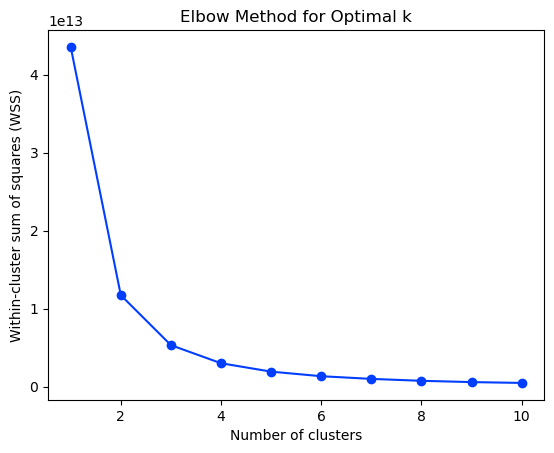

In [89]:
from sklearn.cluster import KMeans

wss = []

for i in range(1, 11):
    cls = KMeans(n_clusters=i, random_state=42)  
    cls.fit(df_pca)  
    wss.append(cls.inertia_) 

plt.plot(range(1, 11), wss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares (WSS)')
plt.show()

In [90]:
model = KMeans(n_clusters=3, random_state=42)  
model.fit_predict(df11)  
clusters = model.labels_

In [91]:
df_pca['Cluster'] = clusters
df_pca.head()

,PC1,PC2,Cluster
0,648.966426,74.919376,2
1,-16251.886261,200.412621,0
2,-2318.102422,452.179538,2
3,-12946.430739,-80.077177,0
4,31203.779969,-158.473435,1


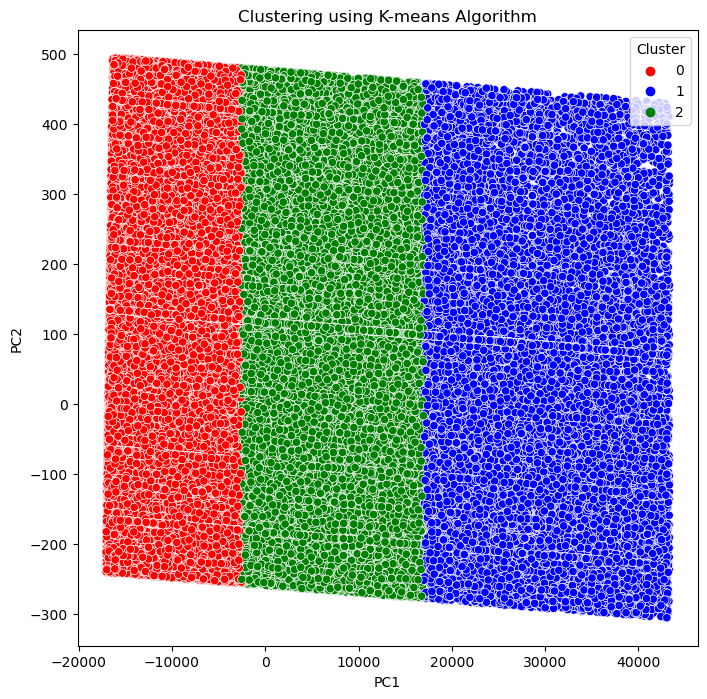

In [92]:
plt.figure(figsize = (8, 8))
ax = sns.scatterplot(x = 'PC1', y = 'PC2', hue = 'Cluster', data = df_pca, palette = ['red', 'blue', 'green', 'black'])
plt.title("Clustering using K-means Algorithm")
plt.show()

In [93]:
df11['Clusters'] = clusters
df11.sample(5)

,CustGender,CustAccountBalance,TransactionAmount,Age,BalTransRatio,TransactionMonth,AGRA,AHMEDABAD,ALIGARH,ALLAHABAD,...,SILIGURI,SONIPAT,SURAT,THANE,UDAIPUR,VADODARA,VISAKHAPATNAM,WARANGAL,ZIRAKPUR,Clusters
740687,1,9845.42,594.96,40,0.060430,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
156501,1,1618.24,535.00,36,0.330606,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
533059,1,3417.07,275.00,49,0.080478,8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
131417,1,53329.34,161.00,33,0.003019,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
162744,1,11075.94,200.00,38,0.018057,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
df10.columns

Index(['CustGender', 'CustLocation', 'CustAccountBalance', 'TransactionAmount',
       'Age', 'BalTransRatio', 'TransactionMonth'],
      dtype='object')

In [95]:
df11['CustLocation'] = df10['CustLocation']

In [96]:
df12 = pd.concat([df10, df11['Clusters']], axis = 1)
df12.head()

,CustGender,CustLocation,CustAccountBalance,TransactionAmount,Age,BalTransRatio,TransactionMonth,Clusters
2,0,MUMBAI,17874.44,459.00,28,0.025679,2,2
6,0,MUMBAI,973.46,566.00,32,0.581431,2,0
8,0,GURGAON,14906.96,833.00,36,0.055880,2,2
9,1,MUMBAI,4279.22,289.11,40,0.067561,2,0
10,1,MOHALI,48429.49,259.00,42,0.005348,2,1


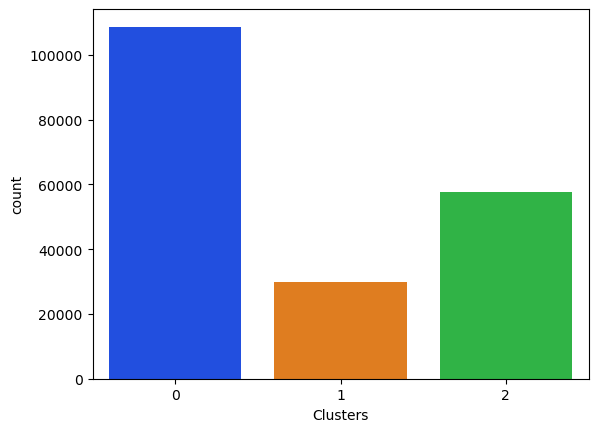

In [97]:
sns.countplot(df12, x = 'Clusters')
plt.show()

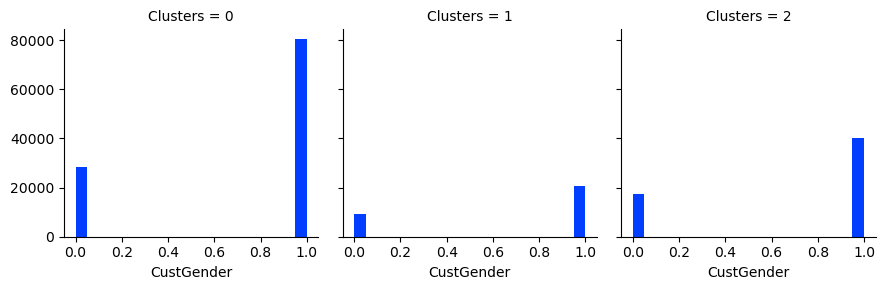

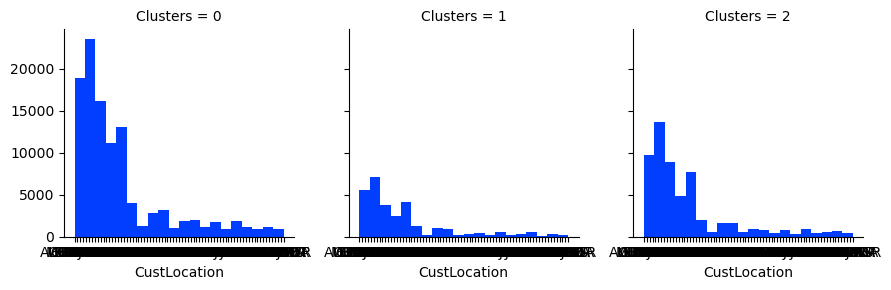

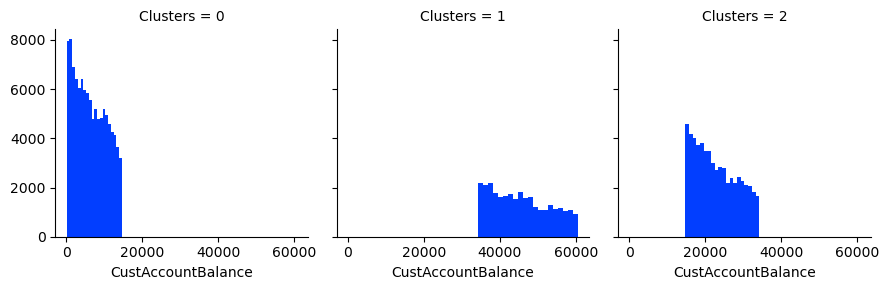

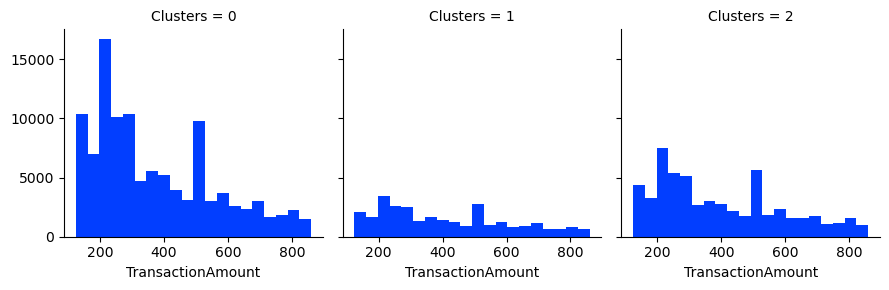

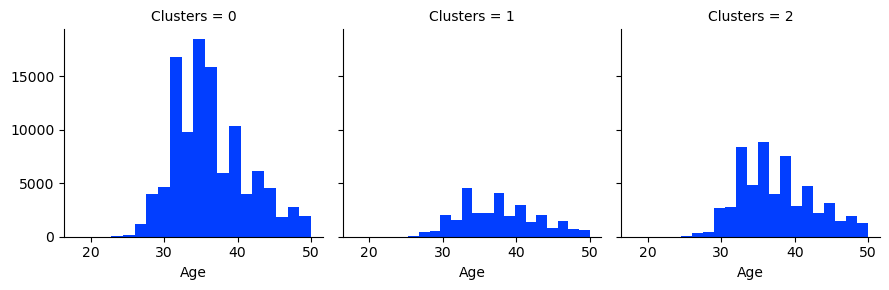

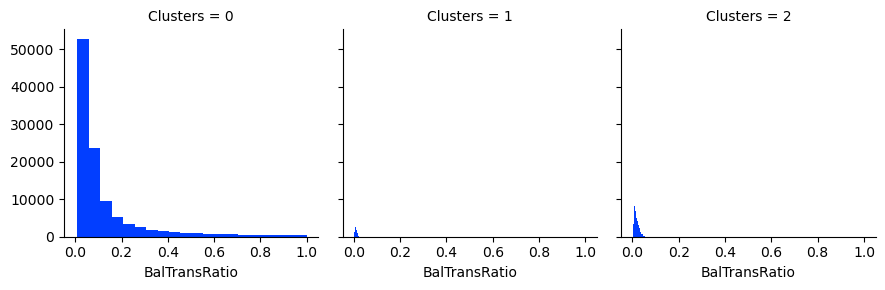

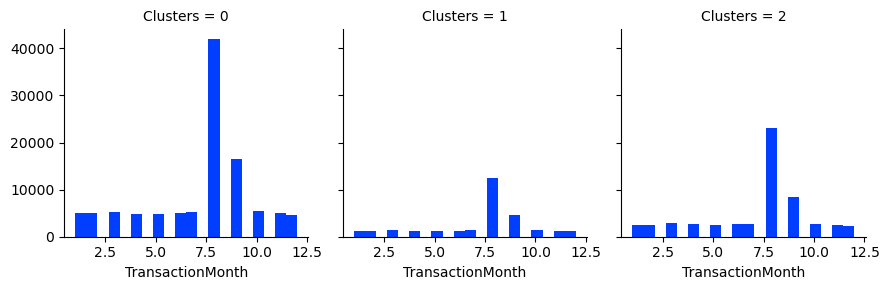

In [98]:
numeric_columns = df12.drop(['Clusters'], axis=1).columns

for c in numeric_columns:
    grid = sns.FacetGrid(df12, col='Clusters')
    grid.map(plt.hist, c, bins=20)  
    plt.xlabel(c)
    plt.show()

In [99]:
import joblib 
joblib.dump(model, 'k_means_model.pkl')

['k_means_model.pkl']

In [100]:
df12.to_csv("clustered_data.csv")

# TRAINING AND TESTING MODEL ACCURACY 

In [102]:
# Import machine learning models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Import tools for creating pipelines and performing grid search
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score

# Import metrics for evaluating model performance
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve

# Import feature selection methods
from sklearn.feature_selection import SelectKBest, chi2, RFE

# Standardization and scaling
from sklearn.preprocessing import StandardScaler

In [103]:
data = pd.read_csv("clustered_data.csv")
data.head()

,Unnamed: 0,CustGender,CustLocation,CustAccountBalance,TransactionAmount,Age,BalTransRatio,TransactionMonth,Clusters
0,2,0,MUMBAI,17874.44,459.00,28,0.025679,2,2
1,6,0,MUMBAI,973.46,566.00,32,0.581431,2,0
2,8,0,GURGAON,14906.96,833.00,36,0.055880,2,2
3,9,1,MUMBAI,4279.22,289.11,40,0.067561,2,0
4,10,1,MOHALI,48429.49,259.00,42,0.005348,2,1


In [104]:
if 'Unnamed: 0' in data.columns:
    data = data.drop(columns=['Unnamed: 0'])
data.columns

Index(['CustGender', 'CustLocation', 'CustAccountBalance', 'TransactionAmount',
       'Age', 'BalTransRatio', 'TransactionMonth', 'Clusters'],
      dtype='object')

In [105]:
X = data.drop(["CustLocation", "Clusters"], axis = 1)
y = data.Clusters

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

# Feature Selection
selector = SelectKBest(score_func = chi2, k = (data.shape[1]//2))
selector

SelectKBest(k=4, score_func=<function chi2 at 0x000001E5312F45E0>)

In [106]:
X_new = selector.fit_transform(X_train, y_train)
selected_features_mask = selector.get_support()
selected_columns = X.columns[selected_features_mask]
selected_columns

Index(['CustAccountBalance', 'TransactionAmount', 'Age', 'BalTransRatio'], dtype='object')

In [107]:
X_test_selected = selector.transform(X_test)
X_test_selected

array([[1.42107400e+04, 8.27130000e+02, 3.90000000e+01, 5.82045692e-02],
       [1.01271000e+03, 1.27000000e+02, 3.30000000e+01, 1.25406089e-01],
       [8.76623000e+03, 3.80000000e+02, 4.70000000e+01, 4.33481668e-02],
       ...,
       [3.41382100e+04, 4.20000000e+02, 4.40000000e+01, 1.23029298e-02],
       [7.16030000e+02, 3.00000000e+02, 4.80000000e+01, 4.18976859e-01],
       [1.07784900e+04, 4.08000000e+02, 3.20000000e+01, 3.78531687e-02]])

In [108]:
# Define models
models = [
    ("LogisticRegression", LogisticRegression()),
    ("DecisionTreeClassifier", DecisionTreeClassifier()),
    ("RandomForestClassifier", RandomForestClassifier()),
    ("GradientBoostingClassifier", GradientBoostingClassifier()),
    ("AdaBoostClassifier", AdaBoostClassifier()),
    ("KNeighborsClassifier", KNeighborsClassifier()),
    ("SVC", SVC(probability=True)),
    ("GaussianNB", GaussianNB())
]

# Evaluate models
for name, model in models:
    print(f"Training {name}...")
    pipe = Pipeline([
        ('selector', SelectKBest(score_func=chi2, k=(data.shape[1]//2))),
        ('classifier', model)
    ])

    trained = pipe.fit(X_train, y_train)
    y_pred = trained.predict(X_test)

    # Evaluate the model
    print(f"\nResults for {name}:")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    print(f"\nAccuracy Score: {accuracy_score(y_test, y_pred)}")

    # Plot ROC curve if applicable (for binary classification)
    if len(np.unique(y_test)) == 2:
        y_proba = trained.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_proba)
        plt.figure()
        plt.plot(fpr, tpr, label=f'ROC curve for {name}')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for {name}')
        plt.legend()
        plt.show()


Training LogisticRegression...

Results for LogisticRegression:
Confusion Matrix:
[[31249     0  1321]
 [    0  8034   949]
 [ 1044  1020 15229]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96     32570
           1       0.89      0.89      0.89      8983
           2       0.87      0.88      0.88     17293

    accuracy                           0.93     58846
   macro avg       0.91      0.91      0.91     58846
weighted avg       0.93      0.93      0.93     58846


Accuracy Score: 0.926350134248717
Training DecisionTreeClassifier...

Results for DecisionTreeClassifier:
Confusion Matrix:
[[32570     0     0]
 [    0  8983     0]
 [    0     0 17293]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     32570
           1       1.00      1.00      1.00      8983
           2       1.00      1.00      1.00     17293

    accuracy      

# Conclusion and Recomendation

### Customer Segmentation Analysis Report for Global Bank

**Prepared for:** Samantha Evans, Chief Marketing Officer  
**Prepared by:** Innocent Nhamo, Data Scientist  

---

#### **1. Introduction**

This report presents the findings and insights from the customer segmentation analysis conducted for Global Bank. The analysis utilized a comprehensive dataset containing demographic, transactional, and geographical information of approximately 770,000 unique customers after data cleaning and processing.

---

#### **2. Data Quality and Preprocessing**

**Issues Identified:**

1. **Date of Birth Anomalies**:
   - Some dates of birth were found to be unreasonably low or in the future.
   - Customers with missing dates of birth, current locations, and account balances were identified and addressed.

2. **Gender Imbalance**:
   - The dataset showed a significant gender imbalance with 72% male and 28% female customers.

3. **Geographical Distribution**:
   - Locations with only one transaction were removed, considering them insignificant for clustering purposes.

---

#### **3. Key Findings**

**3.1. Demographic Insights:**

- **Gender Distribution**:
  - Male customers: 72%
  - Female customers: 28%
  - Notable gender disparity becoming more pronounced from age 36 onward.

- **Age Group Analysis**:
  - **Age 21**: Highest mean transaction/balance ratio (~0.326), indicating higher spending relative to available funds.
  - **Younger vs. Older**: Age groups 18-25 have higher mean ratios compared to age groups 30-50, suggesting more active financial lives.

**3.2. Geographical Insights:**

- **Major Locations**:
  - 11 out of 73 cities account for 54% of the bank's customers, with Mumbai, Bangalore, and New Delhi being the major ones.
  - Understanding customer locations helps in assessing regional economic risks and regulatory changes.

**3.3. Behavioral Patterns:**

- **Transaction Analysis**:
  - Average transaction amount: INR 1,574
  - Spike in transactions observed in August and September.

- **Account Balance**:
  - Average account balance: INR 115,403
  - Significant differences in average account balance and transaction amounts between male and female customers, as well as across different age groups.

---

#### **4. Clustering Results**

Three distinct clusters were identified based on customer behavior and demographics:

**Cluster 1**:
- **Gender**: Predominantly male (3-fold higher than female)
- **Account Balance**: INR 0 - 17,000
- **Transaction Amount**: More frequent transactions
- **Age**: Higher proportion in the 30s
- **Balance/Transaction Ratio**: Low ratios indicating low spending relative to account balance

**Cluster 2**:
- **Gender**: Male (2-fold higher than female)
- **Account Balance**: INR 37,000 - 60,000
- **Transaction Amount**: Least frequent transactions

**Cluster 3**:
- **Gender**: Male (2-fold higher than female)
- **Account Balance**: INR 17,000 - 37,000
- **Transaction Amount**: Moderate transaction frequency

---

#### **5. Recommendations**

- **Gender-Specific Promotions**: Create promotions appealing more to female customers to balance gender representation. As capital one research highlighted on the fact that women are frequent purchases of consumer goods, this would enable the bank to coup more on transactional income.

- https://capitaloneshopping.com/research/male-vs-female-shopping-statistics/
